<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_07/12_text_augmentation_nlpaug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install dependencies
!pip install -q nlpaug transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 9.6 MB/s eta 0:00:00


In [2]:
# Step 2: Imports
import nlpaug.augmenter.word as naw
import random
import matplotlib.pyplot as plt

In [3]:
# Step 3: Sample Dataset
texts = [
    "The movie was fantastic and had a great storyline.",
    "I absolutely loved the performance of the lead actor.",
    "The plot was dull and predictable.",
    "This was a waste of time, I wouldn’t recommend it.",
    "Cinematography and music were top notch."
]


In [8]:
# Step 4: Define Augmenters (excluding WordNet due to NLTK conflict)
swap_aug = naw.RandomWordAug(action="swap")
delete_aug = naw.RandomWordAug(action="delete")
bert_aug = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action='substitute')

# Step 5: Apply and Print Results
print("Original vs Augmented Texts (Swap / Delete / BERT Substitute):\n")
for text in texts:
    print(f"Original:   {text}")
    print(f"Swap:       {swap_aug.augment(text)}")
    print(f"Delete:     {delete_aug.augment(text)}")
    print(f"BERT:       {bert_aug.augment(text)}")
    print("---")

Original vs Augmented Texts (Swap / Delete / BERT Substitute):

Original:   The movie was fantastic and had a great storyline.
Swap:       ['The was movie and fantastic a had great storyline.']
Delete:     ['The was fantastic and great storyline.']
BERT:       ['the story started fantastic and created a great storyline.']
---
Original:   I absolutely loved the performance of the lead actor.
Swap:       ['Absolutely loved I the performance the of lead actor.']
Delete:     ['I absolutely loved performance of actor.']
BERT:       ['i greatly loved the work of his lead actor.']
---
Original:   The plot was dull and predictable.
Swap:       ['The plot was dull predictable and.']
Delete:     ['Plot dull predictable.']
BERT:       ['the movement remains dull an predictable.']
---
Original:   This was a waste of time, I wouldn’t recommend it.
Swap:       ['This was a of waste time, wouldn I ’ recommend t it.']
Delete:     ['This was waste of time, ’ recommend.']
BERT:       ['this was a waste 

In [9]:
# Step 6: Word Count Distribution (Swap Augment)
num_trials = 50
orig_len = []
swap_len = []
for _ in range(num_trials):
    idx = random.randint(0, len(texts) - 1)
    original = texts[idx].split()

    aug_result = swap_aug.augment(texts[idx])
    augmented = aug_result[0] if isinstance(aug_result, list) else aug_result
    augmented = augmented.split()

    orig_len.append(len(original))
    swap_len.append(len(augmented))


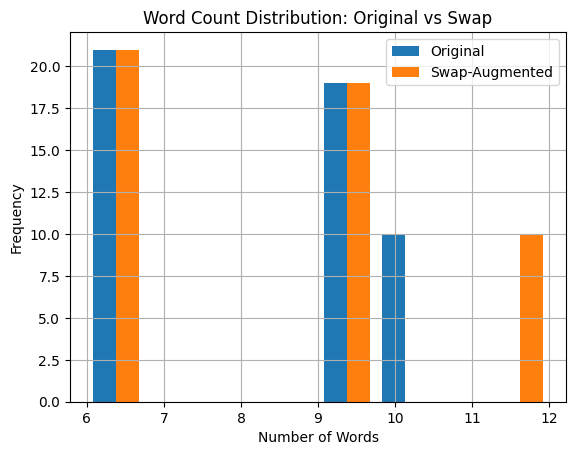

In [10]:
plt.hist([orig_len, swap_len], label=["Original", "Swap-Augmented"], bins=8)
plt.title("Word Count Distribution: Original vs Swap")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()
